<a href="https://colab.research.google.com/github/gregumo1987/MLA_GGM/blob/main/MLA5_GGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 5**  
## **Greg Gutierrez**
## **CS430**
## **Machine Learning in the Cloud** 
---

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for Specific Models

In [3]:
# Import models.
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [4]:
from sklearn import set_config
set_config(display='diagram')

## Imports for Splitting Data and Building Pipeline


In [18]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
from sklearn import set_config
set_config(display='diagram')

## Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Problem 1: Land Satellite Data

### Reading the Data

In [6]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Bar Plots of Land Type Counts

- Numeric Land Type

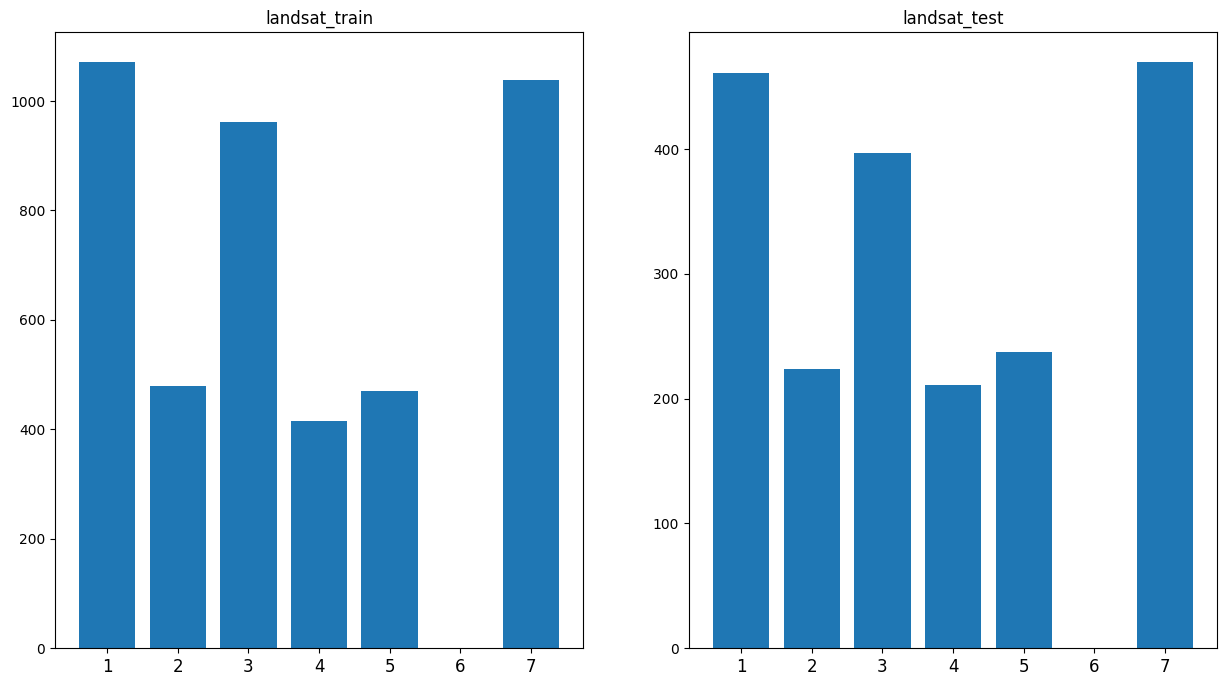

In [7]:
# create a dataframe with the land_type counts
df_train = landsat_train['land_type'].value_counts().rename_axis('land_type').reset_index(name='count')
df_test = landsat_test['land_type'].value_counts().rename_axis('land_type').reset_index(name='count')
# sort the columns for each dataframe so they will be plotted in the same order
df_train.sort_values(by=['land_type'], ascending=True, inplace=True)
df_test.sort_values(by=['land_type'], ascending=True, inplace=True)
# create bar plots
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
#plotting for train data
ax1.bar(df_train['land_type'], df_train['count'])
#plotting for test data
ax2.bar(df_test['land_type'], df_test['count'])
ax1.set_title('landsat_train')
ax2.set_title('landsat_test')
plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels(), fontsize=12)
plt.show()

- Land Type Converted to Text

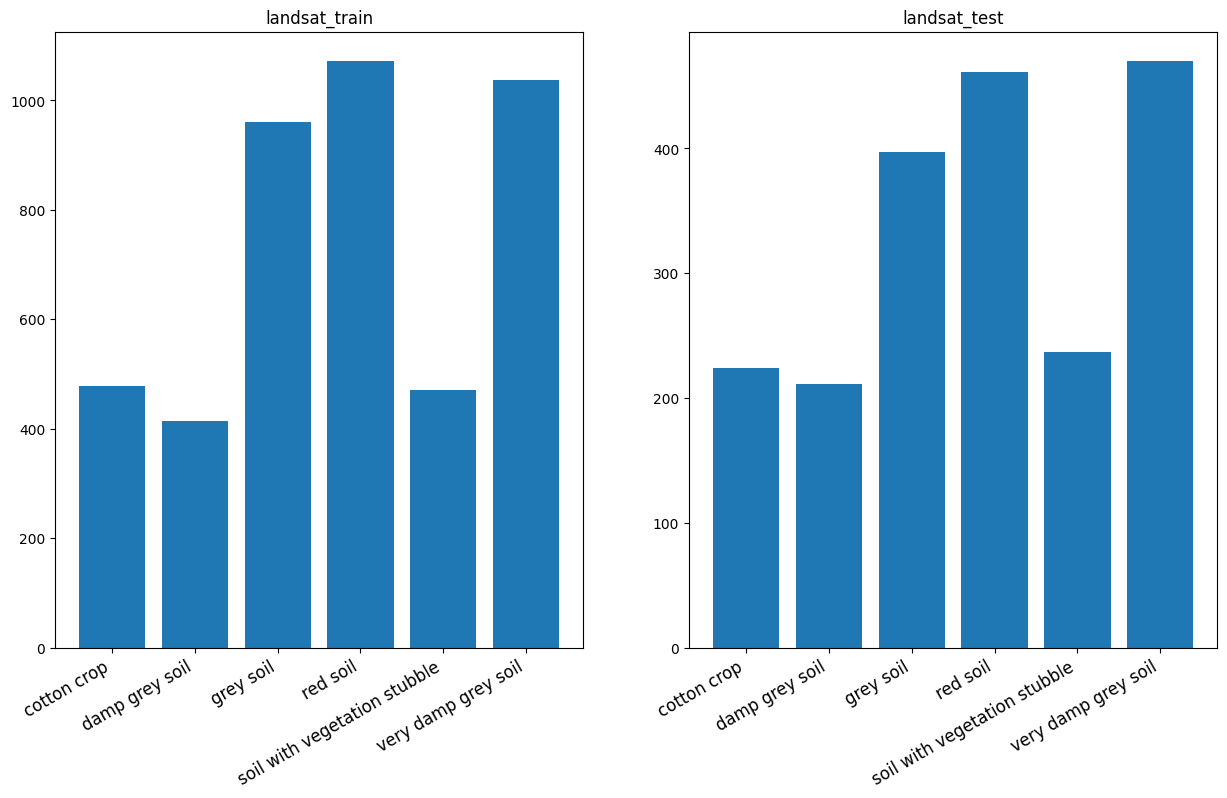

In [15]:
# create a dataframe with the land_type counts
df_train = landsat_train['land_type'].value_counts().rename_axis('land_type').reset_index(name='count')
df_test = landsat_test['land_type'].value_counts().rename_axis('land_type').reset_index(name='count')
# convert land type from numeric to text
df_train['land_type'] = df_train['land_type'].apply(lambda x: 'red soil' if x==1 
                                        else 'cotton crop' if x==2 
                                        else 'grey soil' if x==3 
                                        else 'damp grey soil' if x==4 
                                        else 'soil with vegetation stubble' if x==5 
                                        else 'very damp grey soil') # this data set contains no instances where x==6 (mixture class)
df_test['land_type'] = df_test['land_type'].apply(lambda x: 'red soil' if x==1 
                                        else 'cotton crop' if x==2 
                                        else 'grey soil' if x==3 
                                        else 'damp grey soil' if x==4 
                                        else 'soil with vegetation stubble' if x==5 
                                        else 'very damp grey soil') # this data set contains no instances where x==6 (mixture class)
# sort the columns for each dataframe so they will be plotted in the same order
df_train.sort_values(by=['land_type'], ascending=True, inplace=True)
df_test.sort_values(by=['land_type'], ascending=True, inplace=True)
# create bar plots
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
#plotting for train data
ax1.bar(df_train['land_type'], df_train['count'])
#plotting for test data
ax2.bar(df_test['land_type'], df_test['count'])
ax1.set_title('landsat_train')
ax2.set_title('landsat_test')
plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels(), rotation=30, ha='right', fontsize=12)
plt.show()

### Splitting the Data

In [13]:
X_train = landsat_train.iloc[:,0:-1]
y_train = landsat_train[['land_type']]
X_test = landsat_test.iloc[:,0:-1]
y_test = landsat_test[['land_type']]

### Building the Pipeline

In [20]:
num_attribs = X_train.columns
col_transform = ColumnTransformer(transformers=[
                                 ('num',MinMaxScaler(), num_attribs)],
                                  remainder='passthrough')

In [21]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('rf', RandomForestClassifier(n_estimators=1000, max_samples=4000, bootstrap=True, n_jobs=-1))
]) 
pipeline 

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=4000, n_estimators=1000,
                                        n_jobs=-1))])

### Executing the Model

In [22]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=4000, n_estimators=1000,
                                        n_jobs=-1))])

### Evaluating the Model

In [23]:
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Display the precision, recall, and F1 score for each class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.91       397
           4       0.78      0.64      0.70       211
           5       0.93      0.89      0.91       237
           7       0.87      0.90      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



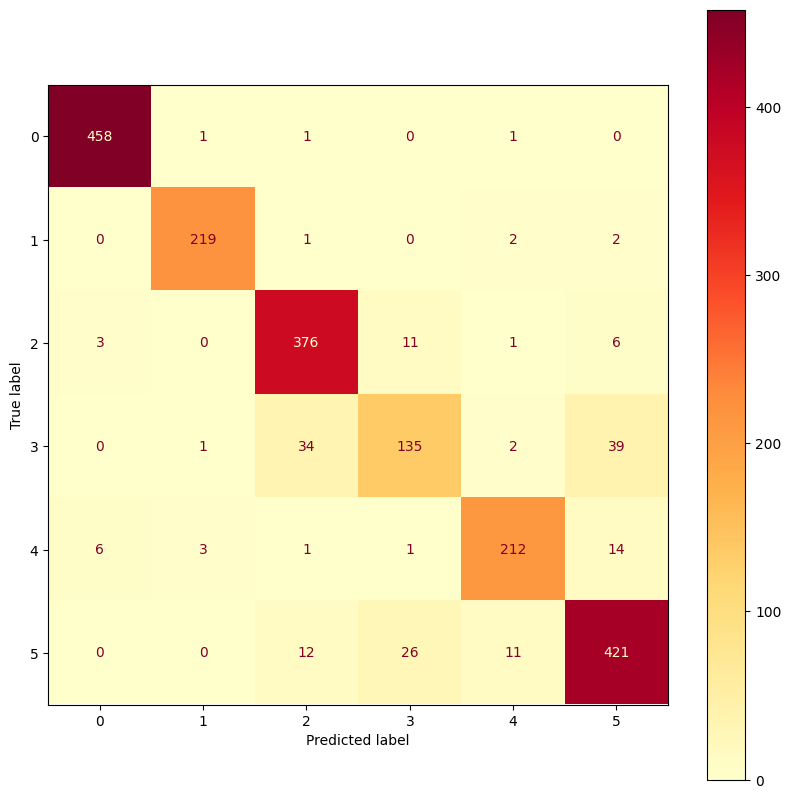

In [24]:
# Display a heat map of the confusion matrix,
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')
plt.show()

### Conclusion
With an accuracy of 91%, the RandomForestClassifier performed reasonably well on this data set for all classes except class 4, "damp grey soil." This is consistent with the performance results reported on the Landsat Satellite web page (https://archive-beta.ics.uci.edu/ml/datasets/statlog+landsat+satellite) where Random Forest Classfication was the best performing model of all those tested. <br><br>Precision, recall, and F1 scores were good for all classes except class 4. The decreased performance for class 4 is possibly related, at least in part, to the fact that class 4 was represented by the fewest number of intances in the training data. Increasing the number of class 4 instances and/or the advanced technique of minority class oversampling could result in improved performance for this model. <br><br>No predictions were made for class 6 because there were no instances of class 6 in the training data, as noted on the web page for this data. 

## Problem 2: Bagging Classifier
For this problem we will use the data from Problem 1.

Install Xgboost

### Building the Pipeline

In [25]:
# SVC(kernel="rbf", gamma=20, C=0.001, probability=True, max_iter=10000)
# n_estimators=10, max_samples=1, bootstrap=True, n_jobs=-1)
pipeline2 = Pipeline([
                     ('transform', col_transform),
                     ('bag_clf', BaggingClassifier(SVC(kernel="rbf", gamma=5, C=0.001, probability=True, max_iter=10000)))
]) 
pipeline2   

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('bag_clf',
                 BaggingClassifier(estimator=SVC(C=0.001, gamma=5,
                                                 max_iter=10000,
                                                 probability=True)))])

### Executing the Model

In [26]:
pipeline2.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('bag_clf',
                 BaggingClassifier(estimator=SVC(C=0.001, gamma=5,
                                                 max_iter=10000,
                                                 probability=True)))])

### Evaluating Model

In [27]:
# Make predictions on the test data.
y_pred2 = pipeline2.predict(X_test)
# Display the precision, recall, and F1 score for each class.
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.98      0.95      0.96       461
           2       0.77      0.99      0.86       224
           3       0.88      0.90      0.89       397
           4       0.62      0.61      0.61       211
           5       0.89      0.79      0.84       237
           7       0.86      0.80      0.83       470

    accuracy                           0.86      2000
   macro avg       0.83      0.84      0.83      2000
weighted avg       0.86      0.86      0.86      2000



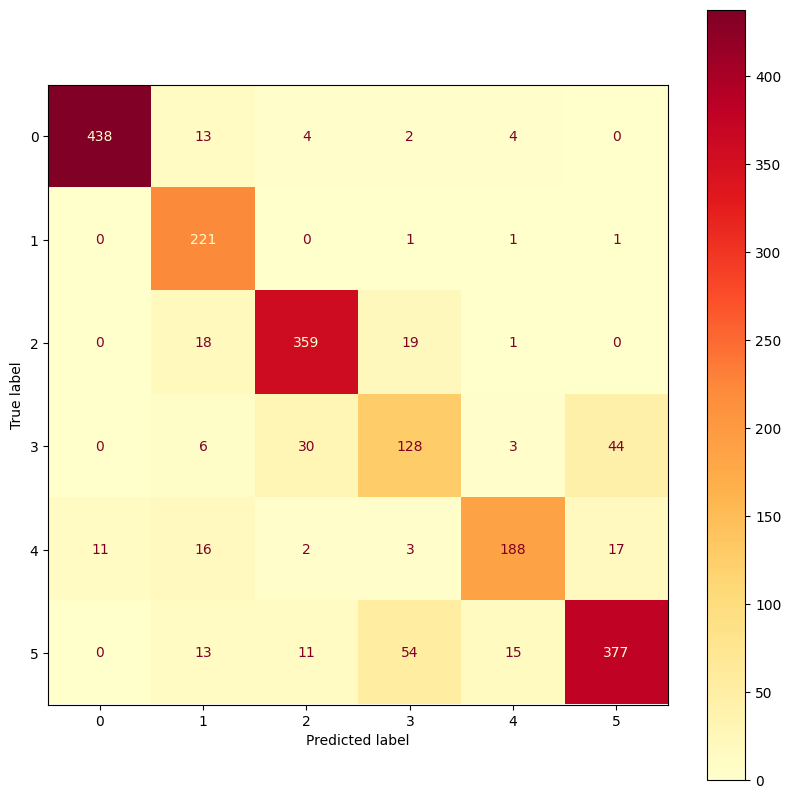

In [28]:
# Display a heat map of the confusion matrix,
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')
plt.show()

### Conclusion
For this problem, a model was developed from a bagging classifier using a support vector machine as the base classifier. An rbf kernel was used for the SVC and the probability hyperparameter was set to True to provide probabilities to the bagging classifier instead of predictions. The default parameters were used for the bagging classifier as no manually set parameters could be found that improved performance over that seen with the defaults.<br><br>This model's performance was significantly less than that seen with the random forest model. Accuracy decreased from 91% to 85% and this model did not predict well for a number of classes. Like the random forest classifier, this model predicted least well for class 4 and again, this is likely secondary, at least in part, to the smaller number of class 4 training instances. This model also showed decreased performance for classes 5 and 7, but not to the degree seen with class 4.

## Problem 3: Random Forest Classifier

### Reading the Data

In [29]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Splitting the Data

In [30]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']
#Split the data into Train/Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [31]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
pipeline3 = Pipeline([
                     ('transform', col_transform),
                     ('rf', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1))

]) 
pipeline3

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_leaf_nodes=16, n_estimators=500,
                                        n_jobs=-1))])

### Executing the Model

In [32]:
pipeline3.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_leaf_nodes=16, n_estimators=500,
                                        n_jobs=-1))])

### Evaluating the Model

In [33]:
# Make predictions on the test data.
y_pred3 = pipeline3.predict(X_test)
# Display the precision, recall, and F1 score for each class.
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



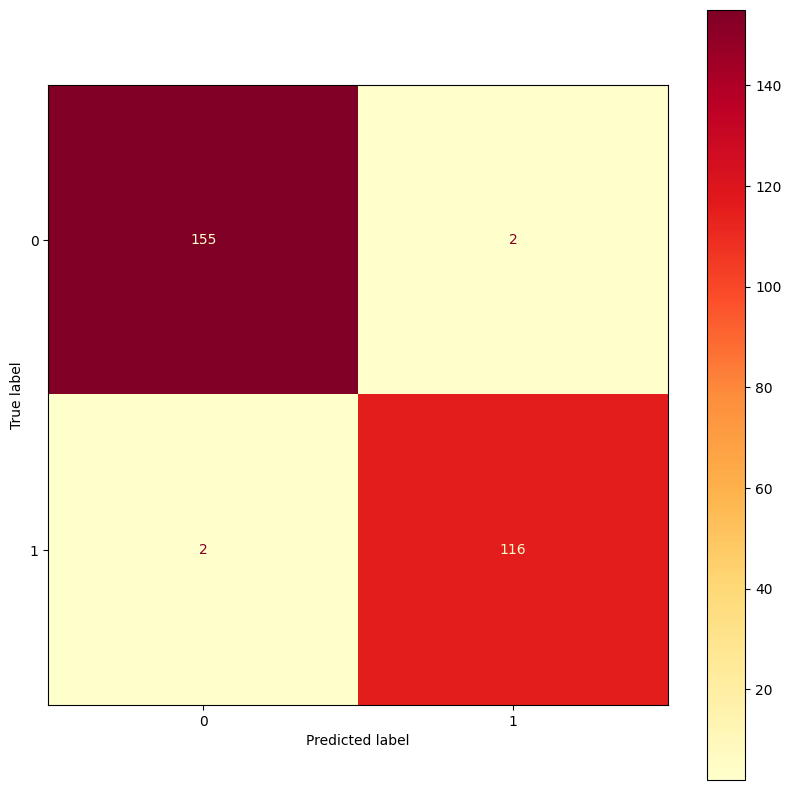

In [34]:
# Display a heat map of the confusion matrix,
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')
plt.show()

### Conclusion
As was the case with a support vector machine model, this random forest model performed extremely well at predicting forgeries from the scaled numeric variables: `variance`, `curtosis`, `skewness`, and `entropy`. Precision, recall, F1 score, and accuracy were all greater than or equal to 98%. Of 118 positive predictions (i.e., forgery) only two were false positives. Of 157 negative predictions (i.e., no forgery) only two were false negatives. Therefore, like the support vector machine model, this random forest model should be more than suitable for predicting forgeries from the specified numeric variables. 